# Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
!pip install pandas-datareader


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
 import pandas_datareader as pdr

In [3]:
key='c86bb2288a34ab164ff03001c9b3a95271b76c6e'

In [4]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

C:\Users\rckzs\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [5]:
df.to_csv('AAPL.csv')

In [6]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-05-11 00:00:00+00:00  188.59  190.06  187.45  189.49  26212221   
       2018-05-14 00:00:00+00:00  188.15  189.53  187.86  189.01  20778772   
       2018-05-15 00:00:00+00:00  186.44  187.07  185.10  186.78  23695159   
       2018-05-16 00:00:00+00:00  188.18  188.46  186.00  186.07  19183064   
       2018-05-17 00:00:00+00:00  186.99  188.91  186.36  188.00  17294029   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-05-11 00:00:00+00:00  45.116563  45.468232  44.843839  45.331871   
       2018-05-14 00:00:00+00:00  45.011301  45.341440  44.941924  45.217040   
       2018-05-15 00:00:00+00:00  44.602216  44.752932  44.281647  44.683555   
       2018-05-16 00:00:00+00:00  45.018478  45.085463  44.496955  44.513701   
       2018-05-17 00:00:00+00:00  44.733793  45.193117  44.583078  44.975416   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-05-11 00:00:00+00:00  104848884     0.73          1.0  
       2018-05-14 00:00:00+00:00   83115088     0.00          1.0  
       2018-05-15 00:00:00+00:00   94780636     0.00          1.0  
       2018-05-16 00:00:00+00:00   76732256     0.00          1.0  
       2018-05-17 00:00:00+00:00   69176116     0.00          1.0

In [7]:
df['high'].describe()

count    1257.000000
mean      191.393873
std        70.329163
min       110.190000
25%       146.430000
50%       169.580000
75%       212.050000
max       515.140000
Name: high, dtype: float64

In [8]:
df.tail()

close    high     low     open     volume  \
symbol date                                                                    
AAPL   2023-05-03 00:00:00+00:00  167.45  170.92  167.16  169.500   65136018   
       2023-05-04 00:00:00+00:00  165.79  167.04  164.31  164.890   81235427   
       2023-05-05 00:00:00+00:00  173.57  174.30  170.76  170.975  113453171   
       2023-05-08 00:00:00+00:00  173.50  173.85  172.11  172.480   55962793   
       2023-05-09 00:00:00+00:00  171.77  173.54  171.60  173.050   45326874   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
AAPL   2023-05-03 00:00:00+00:00    167.45   170.92  167.16  169.500   
       2023-05-04 00:00:00+00:00    165.79   167.04  164.31  164.890   
       2023-05-05 00:00:00+00:00    173.57   174.30  170.76  170.975   
       2023-05-08 00:00:00+00:00    173.50   173.85  172.11  172.480   
       2023-05-09 00:00:00+00:00    171.77   173.54  171.60  173.050   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2023-05-03 00:00:00+00:00   65136018      0.0          1.0  
       2023-05-04 00:00:00+00:00   81235427      0.0          1.0  
       2023-05-05 00:00:00+00:00  113453171      0.0          1.0  
       2023-05-08 00:00:00+00:00   55962793      0.0          1.0  
       2023-05-09 00:00:00+00:00   45326874      0.0          1.0

In [9]:
df.shape

(1257, 12)

In [10]:
df['close'].describe()

count    1257.000000
mean      189.365235
std        69.687200
min       106.840000
25%       144.570000
50%       167.300000
75%       209.680000
max       506.090000
Name: close, dtype: float64

In [11]:
# Plotting 
data=df.reset_index()['close']

In [12]:
data.shape

(1257,)

In [13]:
data.head(),data.tail()

(0    188.59
 1    188.15
 2    186.44
 3    188.18
 4    186.99
 Name: close, dtype: float64,
 1252    167.45
 1253    165.79
 1254    173.57
 1255    173.50
 1256    171.77
 Name: close, dtype: float64)

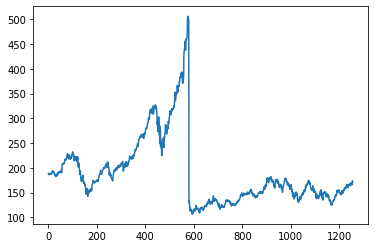

In [14]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.show()

# Preprocessing

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [17]:
data[:10]

array([[0.20475892],
       [0.20365686],
       [0.19937383],
       [0.203732  ],
       [0.20075141],
       [0.19904822],
       [0.20235441],
       [0.20117721],
       [0.20418284],
       [0.20365686]])

In [18]:
# Splitting data
training_size=int(len(data)*0.7)
test_size=int(len(data)*0.3)
train_data,test_data=data[:training_size,:],data[training_size:,:1]

In [19]:
train_data.shape,test_data.shape

((879, 1), (378, 1))

In [20]:
def create_dataset(dataset,time_step=1):
    X,y=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        X.append(a)
        y.append(dataset[i+time_step,0])
    return np.array(X),np.array(y)

In [21]:
time_step=80
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [22]:
X_train.shape,y_train.shape

((798, 80), (798,))

There will be 80 features. Meaning 80 previous day will determine the output(future value of stock) of next day.

In [23]:
# Reshaping
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [24]:
# Building Model

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D

In [26]:
model=Sequential()
model.add(Conv1D(filters=64,activation='relu',input_shape=(80,1),kernel_size=3))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

In [27]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 78, 64)            256       
                                                                 
 lstm (LSTM)                 (None, 78, 32)            12416     
                                                                 
 lstm_1 (LSTM)               (None, 78, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 29,653
Trainable params: 29,653
Non-traina

In [29]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
25/25 [==============================] - 10s 172ms/step - loss: 0.0482 - val_loss: 0.0045
Epoch 2/100
25/25 [==============================] - 3s 114ms/step - loss: 0.0136 - val_loss: 0.0016
Epoch 3/100
25/25 [==============================] - 3s 122ms/step - loss: 0.0091 - val_loss: 6.3313e-04
Epoch 4/100
25/25 [==============================] - 3s 124ms/step - loss: 0.0071 - val_loss: 8.3536e-04
Epoch 5/100
25/25 [==============================] - 3s 116ms/step - loss: 0.0056 - val_loss: 4.0851e-04
Epoch 6/100
25/25 [==============================] - 3s 114ms/step - loss: 0.0053 - val_loss: 8.4187e-04
Epoch 7/100
25/25 [==============================] - 3s 116ms/step - loss: 0.0045 - val_loss: 4.1100e-04
Epoch 8/100
25/25 [==============================] - 3s 123ms/step - loss: 0.0041 - val_loss: 5.2068e-04
Epoch 9/100
25/25 [==============================] - 3s 119ms/step - loss: 0.0033 - val_loss: 3.6505e-04
Epoch 10/100
25/25 [==============================] - 3s 116ms

25/25 [==============================] - 3s 101ms/step - loss: 0.0012 - val_loss: 2.0685e-04
Epoch 79/100
25/25 [==============================] - 3s 101ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 80/100
25/25 [==============================] - 3s 102ms/step - loss: 0.0017 - val_loss: 4.7433e-04
Epoch 81/100
25/25 [==============================] - 3s 101ms/step - loss: 0.0013 - val_loss: 1.9967e-04
Epoch 82/100
25/25 [==============================] - 3s 101ms/step - loss: 0.0012 - val_loss: 2.1363e-04
Epoch 83/100
25/25 [==============================] - 3s 101ms/step - loss: 0.0013 - val_loss: 2.2265e-04
Epoch 84/100
25/25 [==============================] - 3s 102ms/step - loss: 0.0011 - val_loss: 2.1186e-04
Epoch 85/100
25/25 [==============================] - 3s 102ms/step - loss: 0.0014 - val_loss: 5.3859e-04
Epoch 86/100
25/25 [==============================] - 3s 110ms/step - loss: 0.0013 - val_loss: 1.7639e-04
Epoch 87/100
25/25 [==============================] - 3s 114ms/

In [30]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

10/10 [==============================] - 0s 24ms/step


In [31]:
train_pred=scaler.inverse_transform(train_pred)
test_pred=scaler.inverse_transform(test_pred)

In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

220.83330316058053

In [33]:
math.sqrt(mean_squared_error(y_test,test_pred))

151.89895402594743

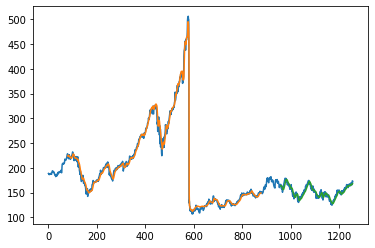

In [34]:
look_back=80
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(data)-1, :] = test_pred
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
# Future Prediction

In [36]:
len(test_data)

378

In [37]:
x_input=test_data[298:].reshape(1,-1)

In [38]:
x_input.shape

(1, 80)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input[:10]

[0.0699311208515967,
 0.0728866624921728,
 0.07105823418910456,
 0.07120851596743893,
 0.07772072636192856,
 0.08583594239198494,
 0.08939261114589853,
 0.08771446462116467,
 0.09297432686286783,
 0.09790857858484658]

In [41]:
from numpy import array

lst_output=[]
n_steps=80
i=0
while(i<30):
    
    if(len(temp_input)>80):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.15826127]
81
1 day input [0.07288666 0.07105823 0.07120852 0.07772073 0.08583594 0.08939261
 0.08771446 0.09297433 0.09790858 0.09056982 0.09380088 0.09665623
 0.11015654 0.11937383 0.11243582 0.11974953 0.11291171 0.11028178
 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967
 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553
 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117
 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517
 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583
 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363
 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341 0.13340013
 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589
 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512
 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306
 0.16262993 0.15826127]
1 day output [[0.1595917]]
2 day input [0.07105823 0.07120852 0.07772073 0.08

12 day output [[0.16097131]]
13 day input [0.11015654 0.11937383 0.11243582 0.11974953 0.11291171 0.11028178
 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967
 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553
 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117
 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517
 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583
 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363
 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341 0.13340013
 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589
 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512
 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306
 0.16262993 0.15826127 0.1595917  0.16012697 0.16037001 0.16050228
 0.16059139 0.16066235 0.16072443 0.160781   0.16083342 0.16088232
 0.16092816 0.16097131]
13 day output [[0.16101214]]
14 day input [0.11937383 0.1124358

24 day output [[0.16140243]]
25 day input [0.10429555 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553
 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117
 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517
 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583
 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363
 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341 0.13340013
 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589
 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512
 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306
 0.16262993 0.15826127 0.1595917  0.16012697 0.16037001 0.16050228
 0.16059139 0.16066235 0.16072443 0.160781   0.16083342 0.16088232
 0.16092816 0.16097131 0.16101214 0.16105105 0.16108836 0.16112448
 0.16115971 0.16119434 0.16122864 0.16126285 0.16129719 0.16133179
 0.16136685 0.16140243]
25 day output [[0.16143872]]
26 day input [0.10537257 0.1065998

In [42]:
day_new=np.arange(1,81)
day_pred=np.arange(81,111)

In [43]:
len(data)

1257

In [44]:
data1=data.tolist()
data1.extend(lst_output)

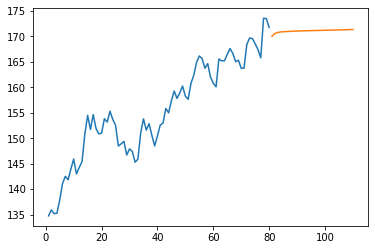

In [45]:
plt.plot(day_new,scaler.inverse_transform(data[1177:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))